In [1]:
from MCNN import MCNN
import torchvision
from pathlib import Path
import torch
import matplotlib.pyplot as plt
import numpy as np

Generating random masks:   0%|          | 0/9999 [00:00<?, ?it/s]

/home/pc-bonito/Projects/montecarlo-cnn-vision/MCNN.py:162: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fix.show()


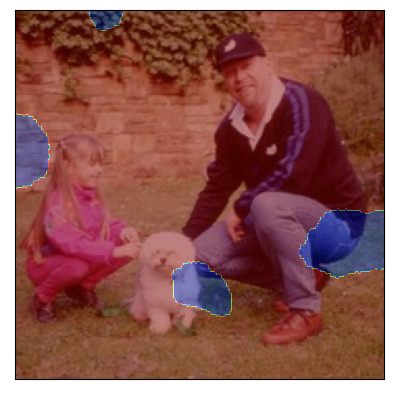

In [2]:
image = torchvision.io.read_image(str(Path('assets') / 'kid_dog_adult.jpg'))
mcnn = MCNN(10000, (224,224), ommit_progress=False)
mcnn.utils.plot_image(image, mcnn.r_maps[5])

In [3]:
from torchvision.models import vgg16, VGG16_Weights

weights = VGG16_Weights.DEFAULT
model = vgg16(weights=weights, progress=False)
transforms = weights.transforms()

mcnn.simulate(image, model, transforms)

Inputting random masks to model:   0%|          | 0/10000 [00:00<?, ?it/s]

Calculating maps results:   0%|          | 0/1000 [00:00<?, ?it/s]

MEAN RANDOM MAP


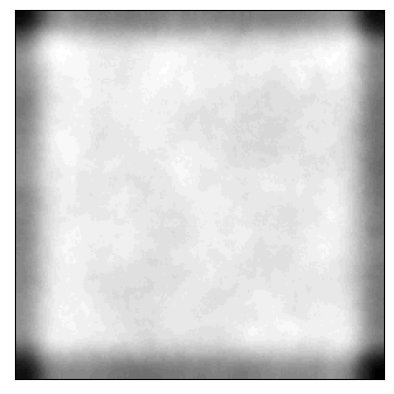

In [4]:
print("MEAN RANDOM MAP")
mcnn.utils.plot_image(mcnn.r_maps.mean_map)

EUCLIDIAN DISTANCE FROM OUTPUT VECTOR


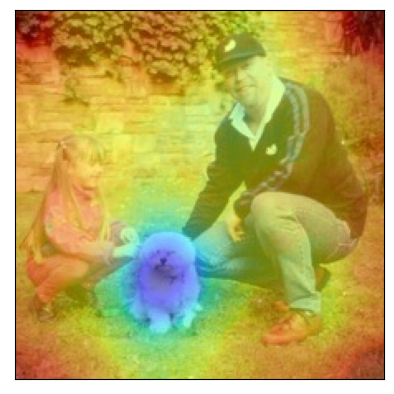

In [5]:
print("EUCLIDIAN DISTANCE FROM OUTPUT VECTOR")
mcnn.utils.plot_image(image, mcnn.attention_map_euclidian)

VECTOR DISTANCE FROM THE RIGTH LABEL


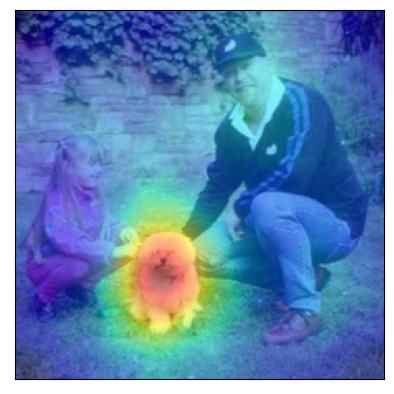

In [16]:
print("VECTOR DISTANCE FROM THE RIGTH LABEL")
mcnn.utils.plot_image(image, mcnn.attention_maps[torch.argmax(mcnn.output_vectors[0]).item()])

Preparing for PCA:   0%|          | 0/1000 [00:00<?, ?it/s]

Calculating SVD of data...


Reshaping PCA maps:   0%|          | 0/1000 [00:00<?, ?it/s]

Done


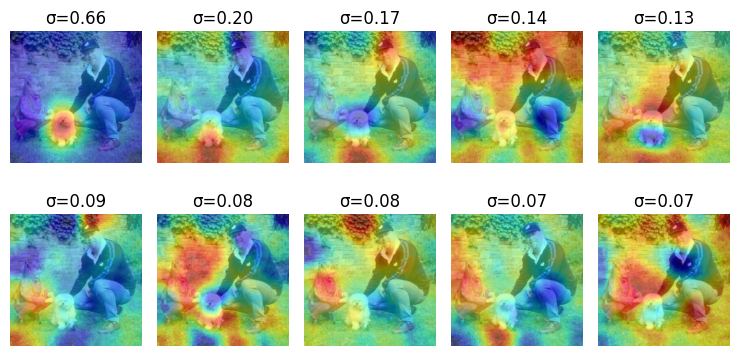

In [14]:
# Vizualize PCA
mcnn.pca()

fig, axes = plt.subplots(2, 5, figsize=(1.5*5,2*2))
for i in range(10):
    ax = axes[i//5, i%5]
    img = torchvision.transforms.ToPILImage()(image.cpu())
    ax.imshow(np.asarray(img), cmap='gray')
    ax.set_title(f'σ={mcnn.S[i]:.2f}')
    ax.imshow(mcnn.attention_maps_pca[i], cmap='jet', alpha=0.5)
    ax.axis('off')

plt.tight_layout()
plt.show()